In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [12]:
import pandas as pd

df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [13]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [14]:
df.shape

(5572, 5)

# Data Cleaning

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


we gonna drop last 3 columns as there are very very less data present 

In [16]:
df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)

In [17]:
df.head()# we have dropped

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


lets rename the columns names as v1 n v2 is not so descriptive

In [18]:
#renaming
df.rename(columns = {'v1':'Target','v2':'Text'},inplace = True)
df.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


label encoding the target variable 

In [19]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [20]:
#label encoding
df['Target'] = encoder.fit_transform(df['Target'])

In [21]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
"""
so in data cleaning we check for
missing values
duplicate values
"""

In [22]:
#checking missing values
df.isna().sum()

Target    0
Text      0
dtype: int64

In [23]:
#checking duplicated values
df.duplicated().sum()

403

In [27]:
#removing duplicated values
df = df.drop_duplicates(keep = 'first')

In [28]:
df.duplicated().sum()

0

so after removing the duplicates shape must have been reduced lets check

In [29]:
df.shape# reduced

(5169, 2)

so data cleaning part is over

# Exploratory Data Analysis

first thing we gonna check is how many spam and ham mails are there

In [30]:
df['Target'].value_counts()

0    4516
1     653
Name: Target, dtype: int64

([<matplotlib.patches.Wedge at 0x1fd1550a1a0>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

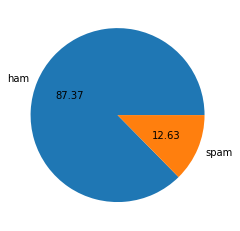

In [31]:
plt.pie(df['Target'].value_counts(),labels = ['ham','spam'],autopct = "%0.2f")

so we can see clearly that data is imbalanced 

In [32]:
import nltk

In [33]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\USER-
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

so for deeper analysis we gonna create 3 new columns which will show 
1.no of characters
2.no of words 
3.no of sentences

In [34]:
# no of characters
df['num_characters'] = df['Text'].apply(len)

C:\Users\USER-PC\AppData\Local\Temp\ipykernel_8372\3954161518.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['Text'].apply(len)


In [35]:
df.head()

,Target,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [36]:
# no of words
df['num_words'] = df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\USER-PC\AppData\Local\Temp\ipykernel_8372\3867753628.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [37]:
df.head()

,Target,Text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [38]:
#no of sentences
df['num_sentence'] = df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\USER-PC\AppData\Local\Temp\ipykernel_8372\3118099299.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentence'] = df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [39]:
df.head()

,Target,Text,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [40]:
#describe function
df[['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


lets analyze it differently for ham and spam

In [41]:
#for ham
df[df['Target']==0][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [43]:
#for spam
df[df['Target']==1][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


from this we can infer also in which terms spam are diff from ham as spam messages are abviously bigger than normal messages as we can see mean of per characters in spam is 137 and in ham it is 70 thats a huge gap and no of words in spam is 27 per sentence 
and 17 in ham so through this we can get an idea how spam are diff than ham
lets plot a graph to have more clear idea

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

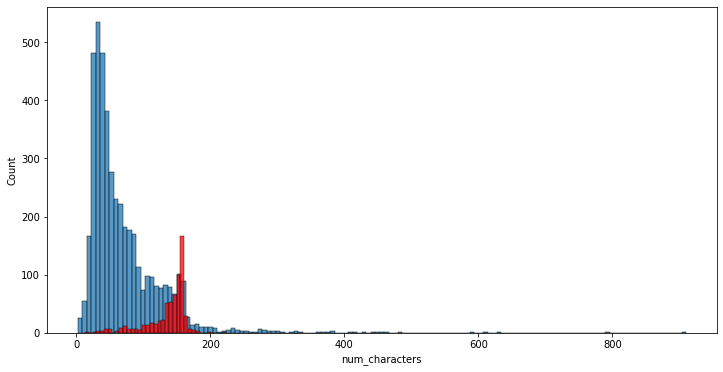

In [47]:
plt.figure(figsize = (12,6))
sns.histplot(df[df['Target']==0]['num_characters'])
sns.histplot(df[df['Target']==1]['num_characters'],color = 'red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

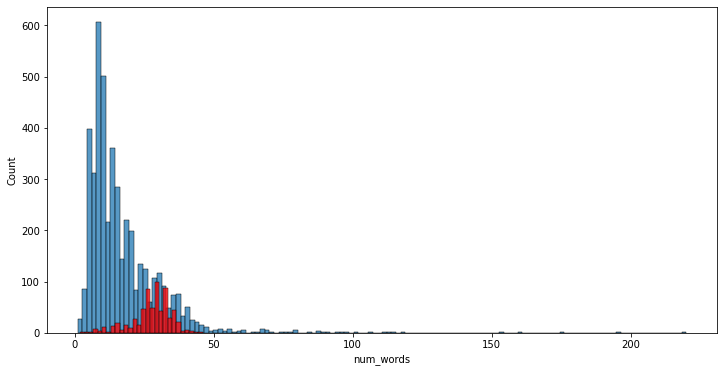

In [48]:
plt.figure(figsize = (12,6))
sns.histplot(df[df['Target']==0]['num_words'])
sns.histplot(df[df['Target']==1]['num_words'],color='red')

so we can clearly see there a diff between span and ham messages as spam messages are normally bigger than ham messages

so lets see relation between columns how much linear they are with each other

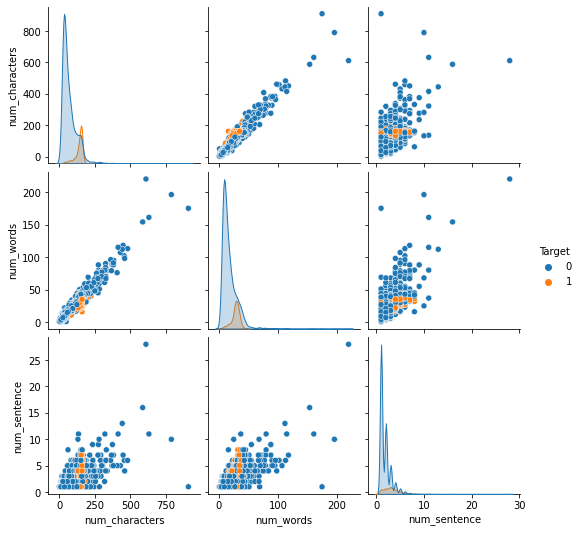

In [50]:
sns.pairplot(df,hue ='Target')

<AxesSubplot:>

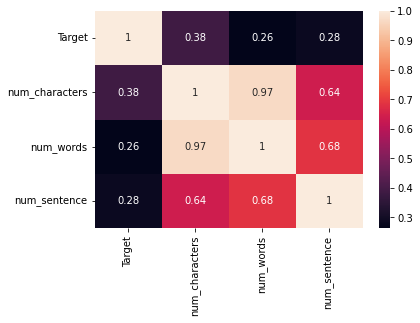

In [51]:
# correlation
sns.heatmap(df.corr(),annot = True)

so we can see there is multicollinearity present between num_words and num_characters so we can take any one column between them 
that also num _characters bcoz as it has high variance with target variables in comparishon of num_words


# Data Preprocessing

In [68]:
import string # for punctuation
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()# for stemming

In [78]:
def transform_text(text):
    text = text.lower()#lower case all characters
    text = nltk.word_tokenize(text)#tokenize
    y  = []
    for i in text:#remove special characters
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
            
    return " ".join(y)
            

In [79]:
df['Transformed_text'] = df['Text'].apply(transform_text)

C:\Users\USER-PC\AppData\Local\Temp\ipykernel_8372\1235748540.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Transformed_text'] = df['Text'].apply(transform_text)


In [80]:
df.head()

,Target,Text,num_characters,num_words,num_sentence,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


lets see the words which occur the most in span and ham for more ideas

In [83]:
!pip install wordcloud

     -------------------------------------- 153.1/153.1 KB 2.3 MB/s eta 0:00:00


You should consider upgrading via the 'C:\Users\USER-PC\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [88]:
#for spam
from wordcloud import WordCloud
wc = WordCloud(width = 500,height = 500,min_font_size = 10,background_color = 'white')

In [89]:
spam_wc = wc.generate(df[df['Target']==1]['Transformed_text'].str.cat(sep = " "))

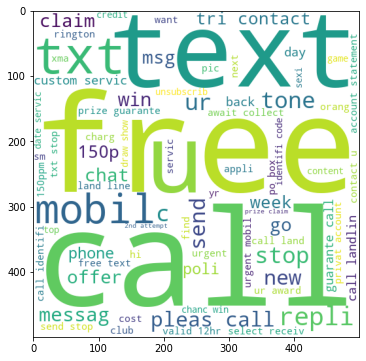

In [90]:
plt.figure(figsize = (12,6))
plt.imshow(spam_wc)

so this are the words which are mostly use in spam 

In [91]:
#for ham
ham_wc = wc.generate((df[df['Target']==0]['Transformed_text'].str.cat(sep = " ")))

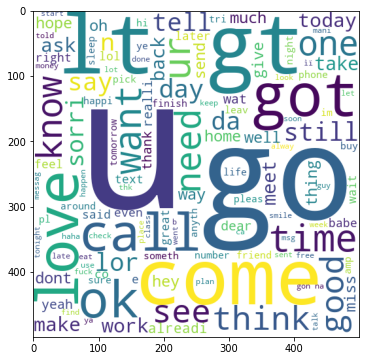

In [93]:
plt.figure(figsize = (12,6))
plt.imshow(ham_wc)

this are the words mostly use in ham messages

but this are two many words lets see the top 30 words for ham and spam

In [95]:
spam_corpus = []
for msg in df[df['Target']==1]['Transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [96]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [97]:
len(spam_corpus)

9939

C:\Users\USER-PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'call'),
  Text(1, 0, 'free'),
  Text(2, 0, '2'),
  Text(3, 0, 'txt'),
  Text(4, 0, 'text'),
  Text(5, 0, 'u'),
  Text(6, 0, 'ur'),
  Text(7, 0, 'mobil'),
  Text(8, 0, 'stop'),
  Text(9, 0, 'repli'),
  Text(10, 0, 'claim'),
  Text(11, 0, '4'),
  Text(12, 0, 'prize'),
  Text(13, 0, 'get'),
  Text(14, 0, 'new'),
  Text(15, 0, 'servic'),
  Text(16, 0, 'tone'),
  Text(17, 0, 'send'),
  Text(18, 0, 'urgent'),
  Text(19, 0, 'nokia'),
  Text(20, 0, 'contact'),
  Text(21, 0, 'award'),
  Text(22, 0, 'phone'),
  Text(23, 0, 'cash'),
  Text(24, 0, 'pleas'),
  Text(25, 0, 'week'),
  Text(26, 0, 'win'),
  Text(27, 0, 'c'),
  Text(28, 0, 'collect'),
  Text(29, 0, 'min')])

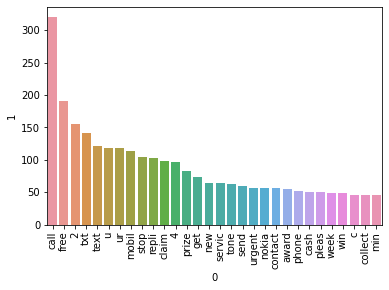

In [102]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')

this are the most 30 recurring words of spam messages

In [103]:
ham_corpus = []
for msg in df[df['Target']==0]['Transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [104]:
len(ham_corpus)

35394

C:\Users\USER-PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'u'),
  Text(1, 0, 'go'),
  Text(2, 0, 'get'),
  Text(3, 0, 'gt'),
  Text(4, 0, 'lt'),
  Text(5, 0, '2'),
  Text(6, 0, 'come'),
  Text(7, 0, 'got'),
  Text(8, 0, 'know'),
  Text(9, 0, 'like'),
  Text(10, 0, 'call'),
  Text(11, 0, 'time'),
  Text(12, 0, 'ok'),
  Text(13, 0, 'love'),
  Text(14, 0, 'good'),
  Text(15, 0, 'want'),
  Text(16, 0, 'ur'),
  Text(17, 0, 'day'),
  Text(18, 0, 'need'),
  Text(19, 0, 'one'),
  Text(20, 0, 'lor'),
  Text(21, 0, '4'),
  Text(22, 0, 'home'),
  Text(23, 0, 'think'),
  Text(24, 0, 'see'),
  Text(25, 0, 'take'),
  Text(26, 0, 'still'),
  Text(27, 0, 'da'),
  Text(28, 0, 'tell'),
  Text(29, 0, 'make')])

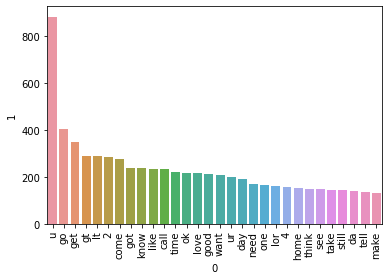

In [105]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')

this are the most 30 recurring words of ham messages

as for model building we need numeric data and our data is in tex form so we have to convert it numeric form 

In [132]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tf = TfidfVectorizer()

In [133]:
X = cv.fit_transform(df['Transformed_text']).toarray()#count vectorizer
x = tf.fit_transform(df['Transformed_text']).toarray()#tfidf

In [109]:
X#count vectorizer

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [134]:
x#tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [110]:
X.shape#count vectorizer

(5169, 6708)

In [135]:
x.shape#tfidf

(5169, 6708)

In [112]:
y = df['Target'].values

In [113]:
y

array([0, 0, 1, ..., 0, 0, 0])

# Train Test Split

In [115]:
from sklearn.model_selection import train_test_split

In [116]:
X_train, X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2,random_state = 2)#count vectorizer

In [136]:
X1_train, X1_test , y1_train , y1_test = train_test_split(x,y,test_size = 0.2,random_state = 2)#tfidf

# Model Building

In [137]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB , BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score 

In [138]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [126]:
#count vectorizer
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [139]:
#tfidf
gnb.fit(X1_train,y1_train)
y1_pred = gnb.predict(X1_test)
print(accuracy_score(y1_test,y_pred))
print(confusion_matrix(y1_test,y_pred))
print(precision_score(y1_test,y_pred))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


here not so much change can be seen between tfidf and count vectorizer

In [128]:
#count vectorizer
mnb.fit(X_train,y_train)
y_pred1 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [140]:
#tfidf
mnb.fit(X1_train,y1_train)
y1_pred1 = mnb.predict(X1_test)
print(accuracy_score(y1_test,y1_pred1))
print(confusion_matrix(y1_test,y1_pred1))
print(precision_score(y1_test,y1_pred1))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


here we can see using tfidf we got 100% precision accuracy may have reduced 

In [129]:
bnb.fit(X_train,y_train)
y_pred2 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [141]:
bnb.fit(X1_train,y1_train)
y1_pred2 = bnb.predict(X1_test)
print(accuracy_score(y1_test,y1_pred2))
print(confusion_matrix(y1_test,y1_pred2))
print(precision_score(y1_test,y1_pred2))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


so after seeing all the accuracy we can conclude that we can go with tfidf MNBaccuracy bcoz of 100% precision rate as data is imbalanced so tfidf with 100% precision rate will be good

# model improvement

as in tfidf we got 100% precision rate let stry to increase its accuracy too

In [142]:
tf = TfidfVectorizer(max_features = 3000)

In [143]:
x = tf.fit_transform(df['Transformed_text']).toarray()#tfidf

In [145]:
x.shape#tfidf

(5169, 3000)

In [146]:
y = df['Target'].values

In [147]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [148]:
X1_train, X1_test , y1_train , y1_test = train_test_split(x,y,test_size = 0.2,random_state = 2)#tfidf

In [149]:
#tfidf
mnb.fit(X1_train,y1_train)
y1_pred1 = mnb.predict(X1_test)
print(accuracy_score(y1_test,y1_pred1))
print(confusion_matrix(y1_test,y1_pred1))
print(precision_score(y1_test,y1_pred1))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0
